In [1]:
import cv2 as cv
import os

name = 'gokul'

In [2]:
cd ..

f:\Works\Sign language\Sign-language


In [3]:
# Path of the file containing the images
PATH = os.path.join('training_images', name)

In [4]:
# Importing the model and setting all the current layers as non-trainable

from keras.models import model_from_json
from keras import Sequential

model = ''

with open("model-bw-2-json.json") as json_file:
    model = model_from_json(json_file.read())
    model.load_weights("model-bw-2-weights.h5")

final_model = Sequential()

i=0
for layer in model.layers[:4]:
    final_model.add(layer) 
    
for layer in final_model.layers:
    layer.trainable = False
   

In [5]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
Total params: 9,568
Trainable params: 0
Non-trainable params: 9,568
_________________________________________________________________


In [6]:
import keras
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Convolution2D, MaxPooling2D

final_model = keras.Sequential(final_model)

# # Second convolution layer and pooling
# final_model.add(Convolution2D(32, (3, 3), activation='relu'))
# # input_shape is going to be the pooled feature maps from the previous convolution layer
# final_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
final_model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
final_model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolution layer and pooling
final_model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
final_model.add(MaxPooling2D(pool_size=(2, 2)))


# Flattening the layers
final_model.add(Flatten())

# Adding a fully connected layer
final_model.add(Dense(units=128, activation='relu'))
final_model.add(Dropout(0.40))
final_model.add(Dense(96, activation='relu'))
final_model.add(Dropout(0.40))
final_model.add(Dense(64, activation='relu'))


# Adding the final dense layer (only 1 as it is a binary class)
final_model.add(Dense(27, activation='sigmoid'))

# Displaying the model summary
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30, 30, 32)        9568      
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)             

In [7]:
import tensorflow as tf
# tf.keras.losses.BinaryCrossentropy

final_model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.5,
        width_shift_range=0.1,
        height_shift_range=0.1,)

test_datagen = ImageDataGenerator(
        rescale=1./255)

sz   = 128
batch_size = 100

data_dir_tr = os.path.join(PATH, 'train')
data_dir_ts = os.path.join(PATH, 'test')


training_set = train_datagen.flow_from_directory(data_dir_tr,
                                                 target_size=(sz, sz),
                                                 batch_size=18,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(data_dir_ts,
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 



Found 1891 images belonging to 27 classes.
Found 809 images belonging to 27 classes.


label -  (18, 27)
image -  (18, 128, 128, 1)
(128, 128, 1)


[]

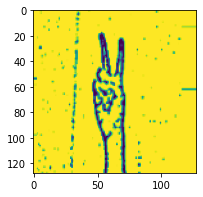

In [9]:
import numpy as np
image, label = training_set.next()
print('label - ',np.shape(label))
print('image - ',np.shape(image))
from matplotlib import pyplot as plt
img = image[0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

print(np.shape(img))
ax.imshow(img)
ax.plot()


In [10]:
letters= ['0', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters[np.argmax(label[0])]

'v'

In [11]:
final_model.fit(
                training_set,
                steps_per_epoch= 100, # No of images in training set
                epochs=25,
                validation_data=test_set,
                validation_steps=77)# No of images in test set

Epoch 1/25
100/100 [==============================] - 8s 72ms/step - loss: 3.2852 - accuracy: 0.0387 - val_loss: 3.1616 - val_accuracy: 0.0390
Epoch 2/25
100/100 [==============================] - 7s 70ms/step - loss: 2.9718 - accuracy: 0.1150 - val_loss: 2.2401 - val_accuracy: 0.3325
Epoch 3/25
100/100 [==============================] - 8s 78ms/step - loss: 2.4543 - accuracy: 0.2457 - val_loss: 1.6724 - val_accuracy: 0.4740
Epoch 4/25
100/100 [==============================] - 6s 62ms/step - loss: 2.0901 - accuracy: 0.3432 - val_loss: 1.4733 - val_accuracy: 0.5325
Epoch 5/25
100/100 [==============================] - 6s 58ms/step - loss: 1.7804 - accuracy: 0.4172 - val_loss: 1.1280 - val_accuracy: 0.6390
Epoch 6/25
100/100 [==============================] - 6s 57ms/step - loss: 1.5362 - accuracy: 0.4756 - val_loss: 0.9193 - val_accuracy: 0.6351
Epoch 7/25
100/100 [==============================] - 6s 59ms/step - loss: 1.4273 - accuracy: 0.5003 - val_loss: 0.7828 - val_accuracy: 0.7078

In [12]:
index = np.argmax(final_model.predict(np.array([img])))
print(letters[index])
print(final_model.predict(np.array([img])))

v
[[3.5968423e-04 4.2377889e-02 2.4666786e-03 1.3241781e-08 1.6335802e-06
  3.0931950e-02 3.3075867e-05 1.4524519e-01 7.1077645e-01 4.4734478e-03
  9.2919540e-01 9.9570596e-01 1.2528685e-01 1.6596103e-01 3.0280346e-01
  2.8805707e-07 1.8231881e-06 1.9928813e-04 8.2061279e-01 1.0332972e-02
  1.0352876e-06 9.0265304e-01 9.9974251e-01 9.9899232e-01 3.0034682e-01
  1.8553406e-02 4.2547882e-03]]


In [13]:
pwd

'f:\\Works\\Sign language\\Sign-language'

In [14]:
final_model.save(os.path.join('Models-final-ours', name + '_Model.h5'))